In [1]:
%matplotlib  inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq


In [3]:
data1= pd.read_parquet('formatparquet.parquet')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Stage           2236 non-null   category      
 1   Date            2236 non-null   datetime64[ns]
 2   Distance        2236 non-null   float64       
 3   Origin          2236 non-null   object        
 4   Destination     2236 non-null   object        
 5   Type            2236 non-null   category      
 6   Winner          2236 non-null   object        
 7   Winner_Country  2184 non-null   object        
 8   annee           2236 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.1+ KB


###  Fixer les options d affichage 

In [5]:
pd.set_option("display.max_rows", 10)  
pd.set_option("expand_frame_repr",True )


In [6]:
data1

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,annee
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,2017
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,2017
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,2017
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,2017
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,2017
...,...,...,...,...,...,...,...,...,...
2231,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA,1903
2232,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA,1903
2233,4,1903-07-12,268.0,Toulouse,Bordeaux,Plain stage,Charles Laeser,SUI,1903
2234,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA,1903


In [7]:
comp = data1.groupby('Winner').count()[['Stage', 'Winner_Country']].nlargest(20,'Stage')

comp

,Stage,Winner_Country
Winner,,
Eddy Merckx,34,34
Mark Cavendish,30,30
Bernard Hinault,28,28
André Leducq,24,24
André Darrigade,22,22
...,...,...
Gino Bartali,12,12
Jean Aerts,12,12
Louis Trousselier,12,12


In [8]:
comp2 =comp.nlargest(20,'Stage')
comp2.sort_values(by = ['Stage'], inplace = True)

In [9]:
comp2.reset_index(inplace =True)

In [10]:
comp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Winner          20 non-null     object
 1   Stage           20 non-null     int64 
 2   Winner_Country  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [11]:
comp2.to_parquet('vetape.parquet')

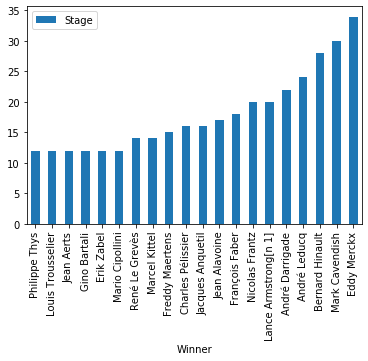

In [12]:
comp2.plot(x ='Winner',  y = 'Stage', kind ='bar' )

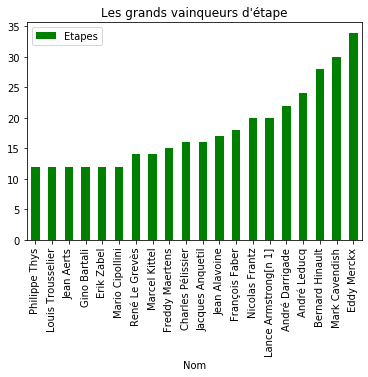

In [13]:
comp2.plot(x ='Winner',  y = 'Stage', kind ='bar' , xlabel = 'Nom', label = 'Etapes', title ="Les grands vainqueurs d'étape", color ='g')

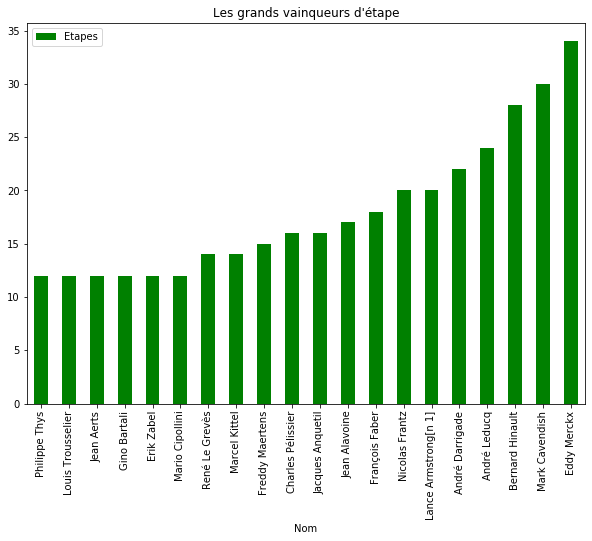

In [13]:
comp2.plot(x ='Winner',  y = 'Stage', kind ='bar' , xlabel = 'Nom', label = 'Etapes', title ="Les grands vainqueurs d'étape",
           color ='g', figsize =(10,7))

### Oubliez tout ca ! 